In [61]:
%pip install ccxt
%pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\msnin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\msnin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [62]:
import ccxt
import math
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta
import datetime
import calendar
import numpy as np

In [63]:
def fetch_historical_data(exchange, symbol, timeframe, since):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['date'] = df['timestamp'].dt.strftime('%m-%d-%y')
    df = df.tail(90) #used to select only the last 90 days of entries into the DF
    return df

In [64]:
#   api key stuff
api_key = 'Z6bH9gXJ7UllNhBuj0'
api_secret = 'gtajv8bMci1T3BIEmTMzgS4PQU5IECuFWqKz'
exchange = ccxt.bybit({'apiKey': api_key, 'secret': api_secret})

#   asset and timeframe
symbol = 'BTCUSDT'
timeframe = '5m'
days = 90
n = math.ceil(12*24*90/1000)

In [65]:
# get today's date and subtract 90 days
today = datetime.datetime.utcnow()
day_90 = today - datetime.timedelta(days)
day_90_midnight = datetime.datetime(day_90.year, day_90.month, day_90.day, 0, 0, 0)
since = int(calendar.timegm(day_90_midnight.utctimetuple()) * 1000) 

# Fetch historical dataa
def create_df(since):
    limit = 12*24*90
    historical_data = exchange.fetch_ohlcv(symbol, timeframe, since = since, limit = limit)

    # Convert data to DataFrame
    df = pd.DataFrame(historical_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df


In [66]:
since_timestamp_list = [since]
# n = math.ceil(12*24*90/1000)
df_big = pd.DataFrame()

for i in range(n):
    df = create_df(since)
    df_big = pd.concat([df_big, df], ignore_index=True)
    since = int((df['timestamp'].max().timestamp() * 1000))
    since_timestamp_list.append(since)

# initial weekend and weekday data set
weekdays_data = df_big[df_big['timestamp'].dt.weekday < 5]  # Monday to Friday
weekends_data = df_big[df_big['timestamp'].dt.weekday >= 5]  # Saturday and Sunday

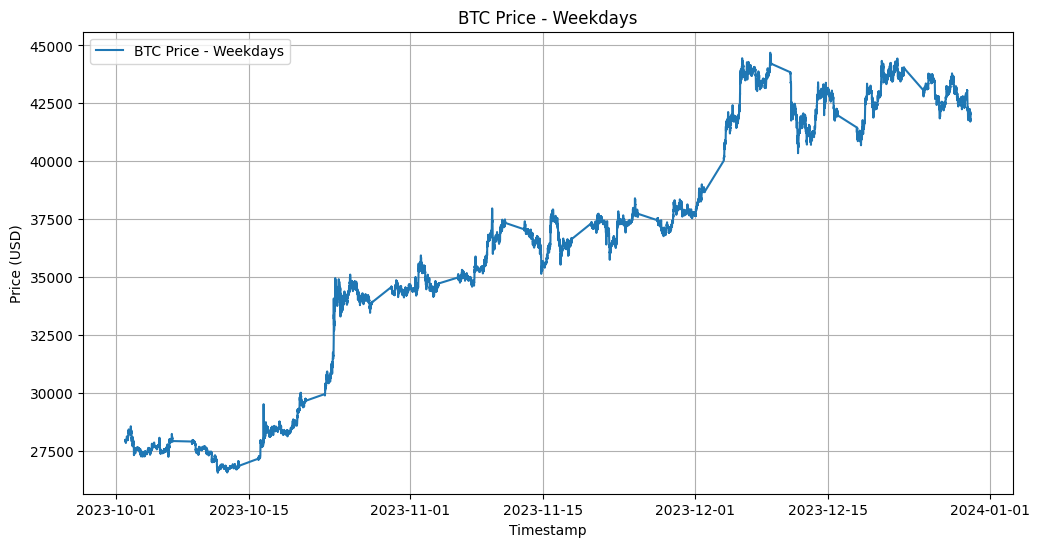

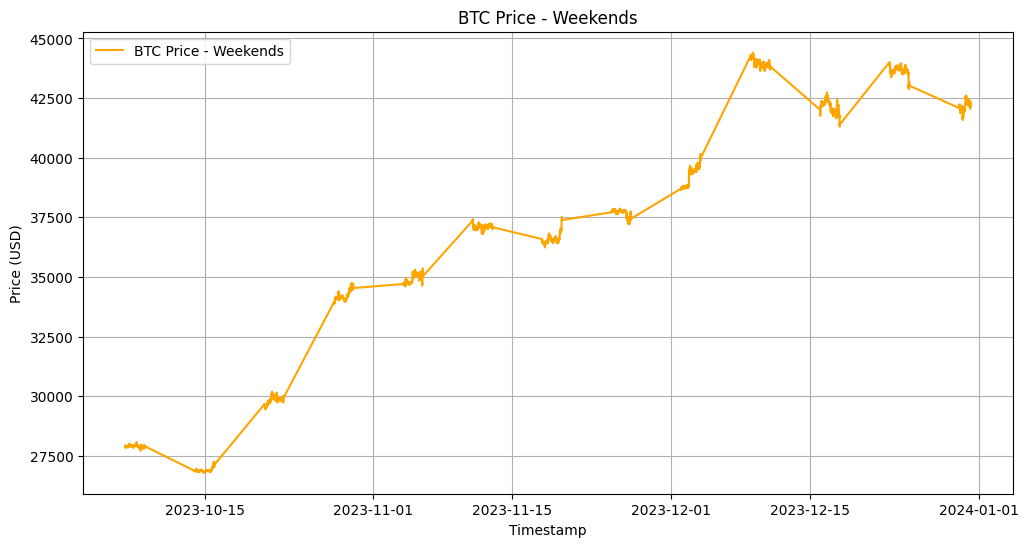

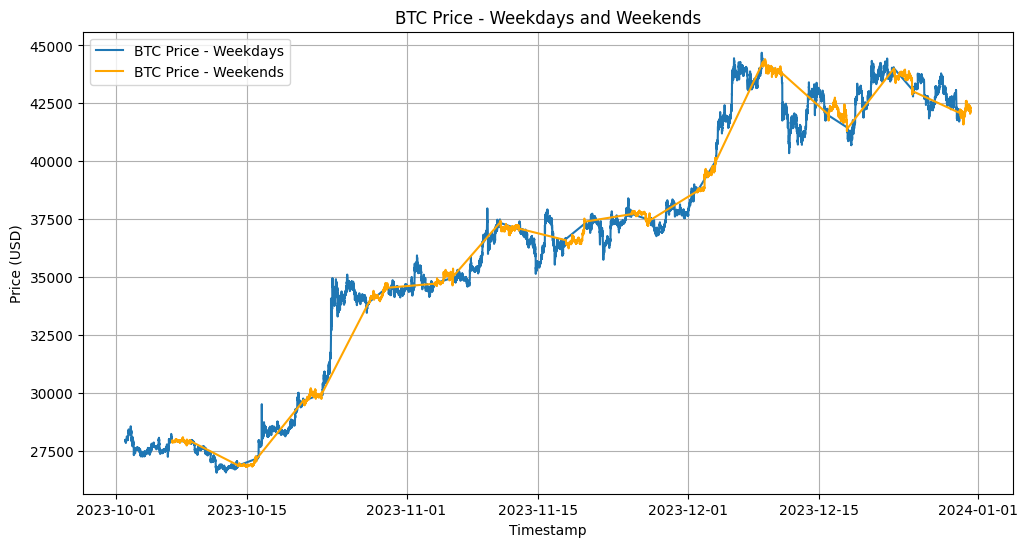

In [ ]:
# Plot for weekdays
plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['close'], label='BTC Price - Weekdays')
plt.title('BTC Price - Weekdays')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for weekends
plt.figure(figsize=(12, 6))
plt.plot(weekends_data['timestamp'], weekends_data['close'], label='BTC Price - Weekends', color='orange')
plt.title('BTC Price - Weekends')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


#overaly both
plt.figure(figsize=(12, 6))
# Plot weekdays_data
plt.plot(weekdays_data['timestamp'], weekdays_data['close'], label='BTC Price - Weekdays')
# Plot weekends_data
plt.plot(weekends_data['timestamp'], weekends_data['close'], label='BTC Price - Weekends', color='orange')
plt.title('BTC Price - Weekdays and Weekends')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

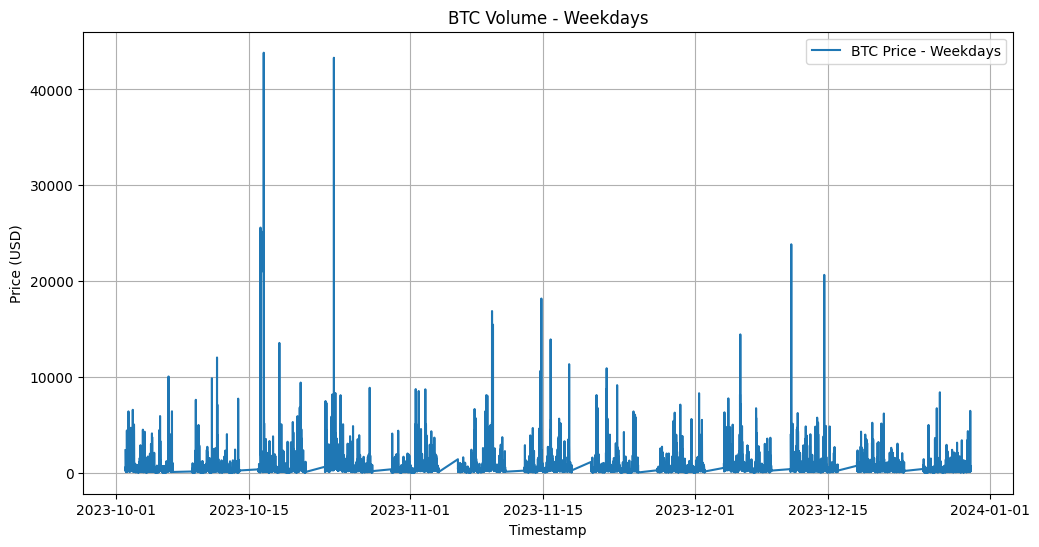

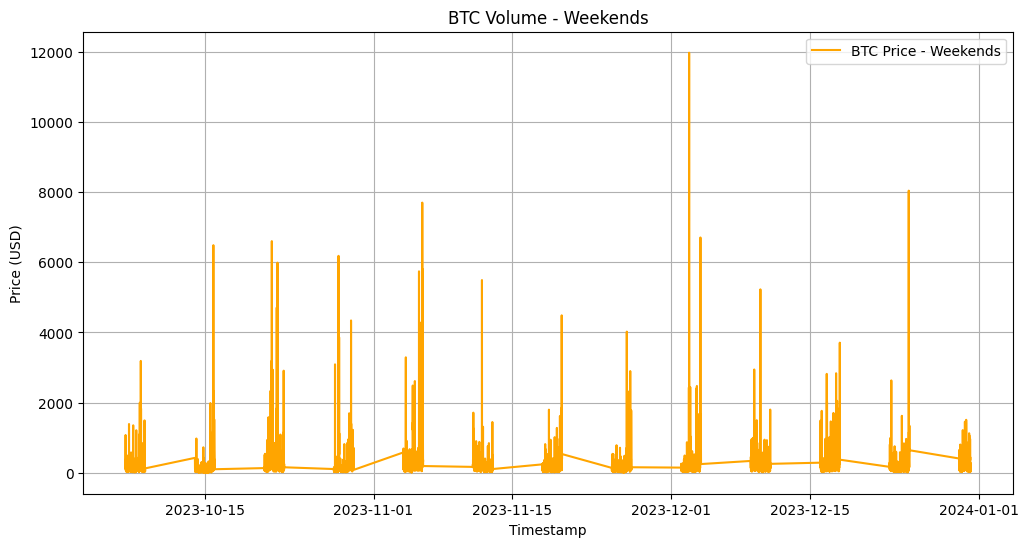

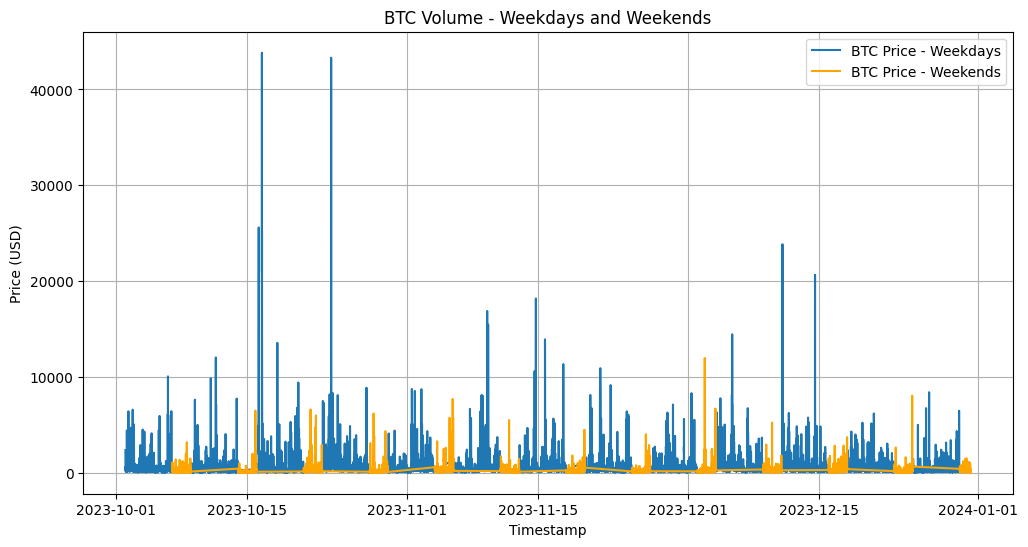

In [ ]:
# Plot for weekdays volume
plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['volume'], label='BTC Price - Weekdays')
plt.title('BTC Volume - Weekdays')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for weekends volume
plt.figure(figsize=(12, 6))
plt.plot(weekends_data['timestamp'], weekends_data['volume'], label='BTC Price - Weekends', color='orange')
plt.title('BTC Volume - Weekends')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

#overaly both volumes
plt.figure(figsize=(12, 6))
# Plot weekdays_data
plt.plot(weekdays_data['timestamp'], weekdays_data['volume'], label='BTC Price - Weekdays')
# Plot weekends_data
plt.plot(weekends_data['timestamp'], weekends_data['volume'], label='BTC Price - Weekends', color='orange')
plt.title('BTC Volume - Weekdays and Weekends')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\msnin\AppData\Local\Temp\ipykernel_27756\4079096030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekdays_data['percent_change'] = (weekdays_data['close'] - weekdays_data['open']) / weekdays_data['open'] * 100


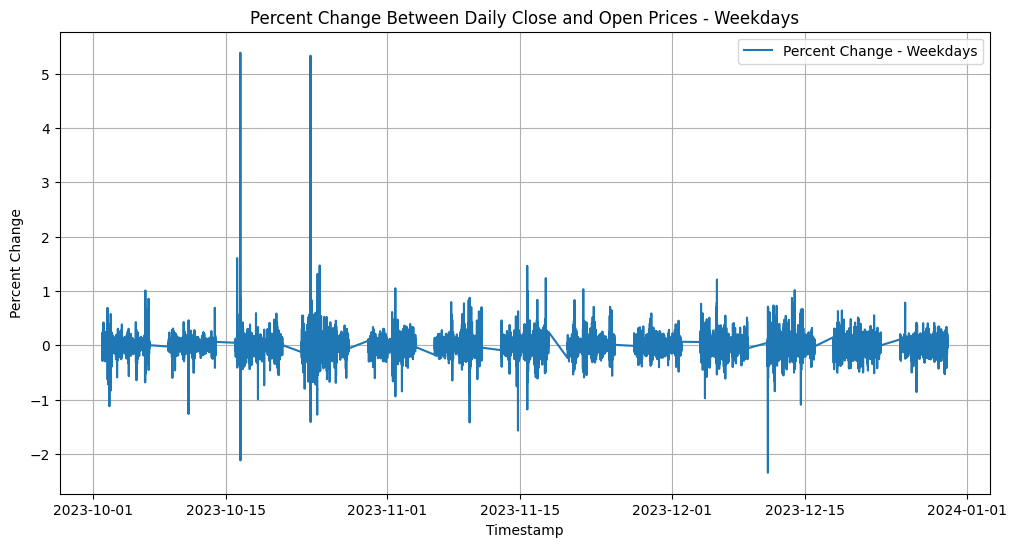

C:\Users\msnin\AppData\Local\Temp\ipykernel_27756\4079096030.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekends_data['percent_change'] = (weekends_data['close'] - weekends_data['open']) / weekends_data['open'] * 100


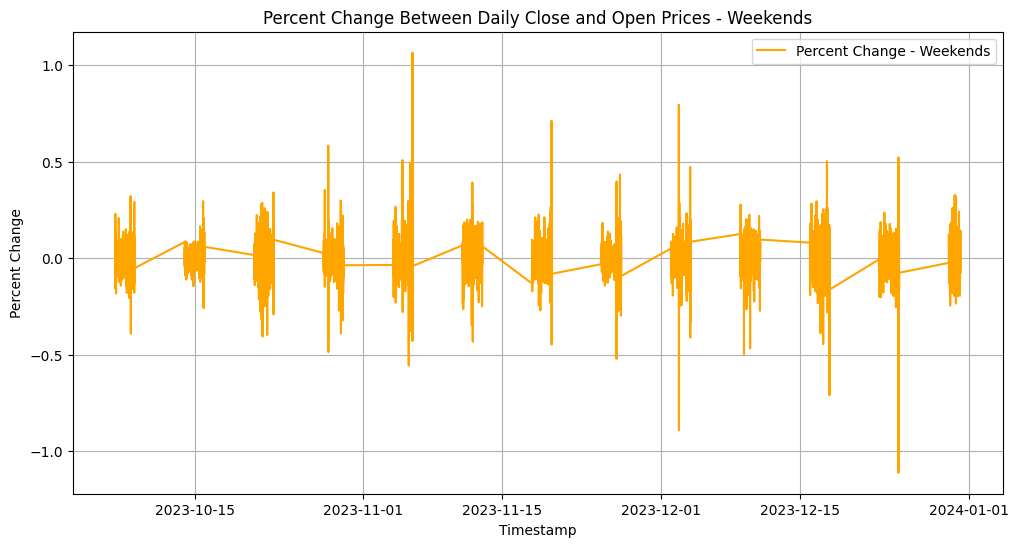

C:\Users\msnin\AppData\Local\Temp\ipykernel_27756\4079096030.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekdays_data['percent_change'] = (weekdays_data['close'] - weekdays_data['open']) / weekdays_data['open'] * 100
C:\Users\msnin\AppData\Local\Temp\ipykernel_27756\4079096030.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekends_data['percent_change'] = (weekends_data['close'] - weekends_data['open']) / weekends_data['open'] * 100


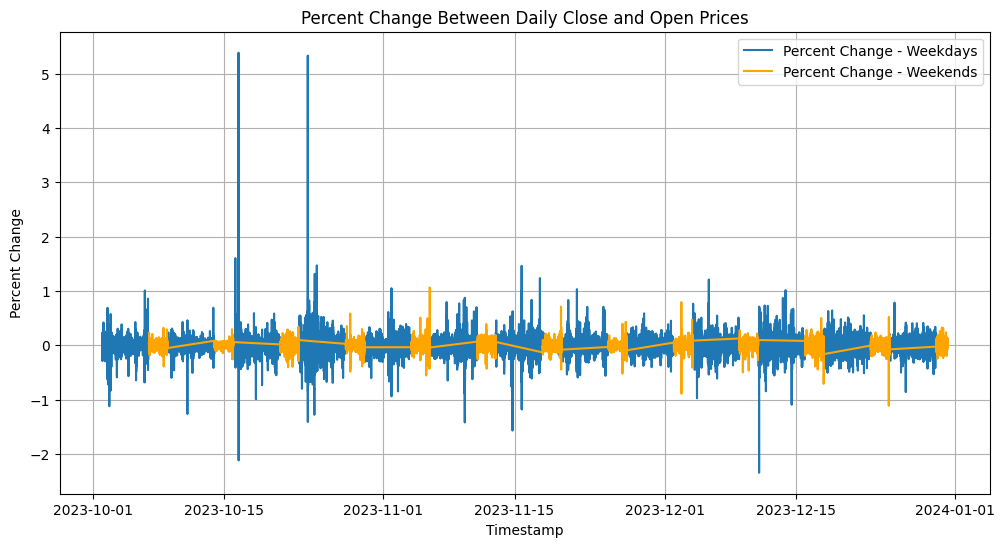

In [ ]:
# Calculate percent change for weekdays
weekdays_data['percent_change'] = (weekdays_data['close'] - weekdays_data['open']) / weekdays_data['open'] * 100

# Plot percent change for weekdays
plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['percent_change'], label='Percent Change - Weekdays')
plt.title('Percent Change Between Daily Close and Open Prices - Weekdays')
plt.xlabel('Timestamp')
plt.ylabel('Percent Change')
plt.legend()
plt.grid(True)
plt.show()

# Calculate percent change for weekends
weekends_data['percent_change'] = (weekends_data['close'] - weekends_data['open']) / weekends_data['open'] * 100

# Plot percent change for weekends
plt.figure(figsize=(12, 6))
plt.plot(weekends_data['timestamp'], weekends_data['percent_change'], label='Percent Change - Weekends', color='orange')
plt.title('Percent Change Between Daily Close and Open Prices - Weekends')
plt.xlabel('Timestamp')
plt.ylabel('Percent Change')
plt.legend()
plt.grid(True)
plt.show()

# Calculate percent change for weekdays
weekdays_data['percent_change'] = (weekdays_data['close'] - weekdays_data['open']) / weekdays_data['open'] * 100
# Calculate percent change for weekends
weekends_data['percent_change'] = (weekends_data['close'] - weekends_data['open']) / weekends_data['open'] * 100
# Plot percent change for both weekdays and weekends on the same graph
plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['percent_change'], label='Percent Change - Weekdays')
plt.plot(weekends_data['timestamp'], weekends_data['percent_change'], label='Percent Change - Weekends', color='orange')
plt.title('Percent Change Between Daily Close and Open Prices')
plt.xlabel('Timestamp')
plt.ylabel('Percent Change')
plt.legend()
plt.grid(True)
plt.show()


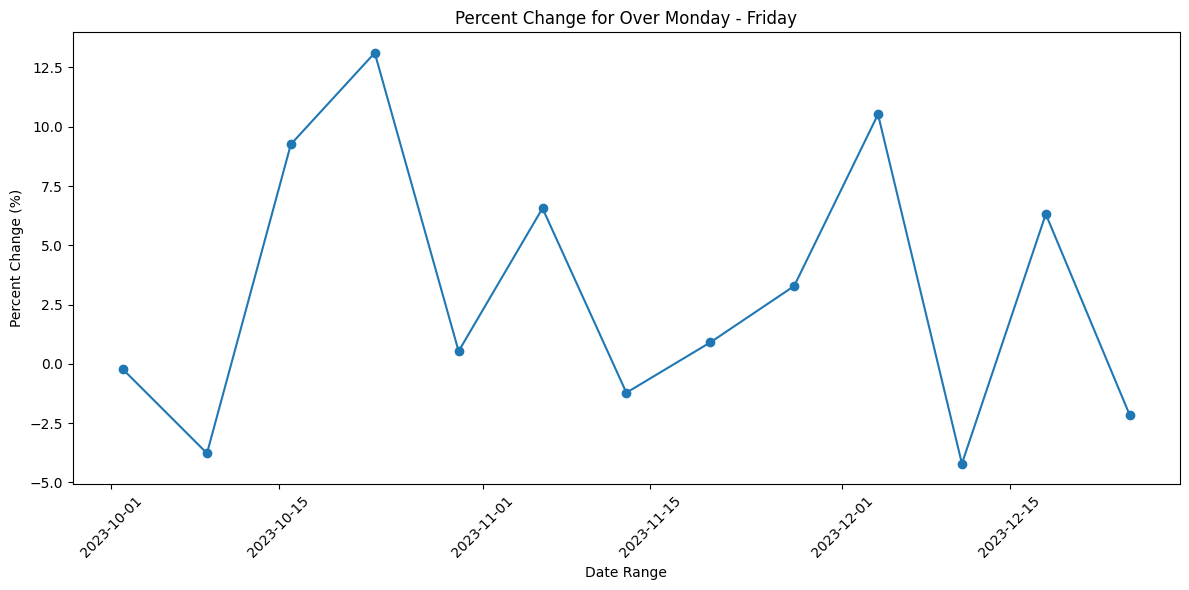

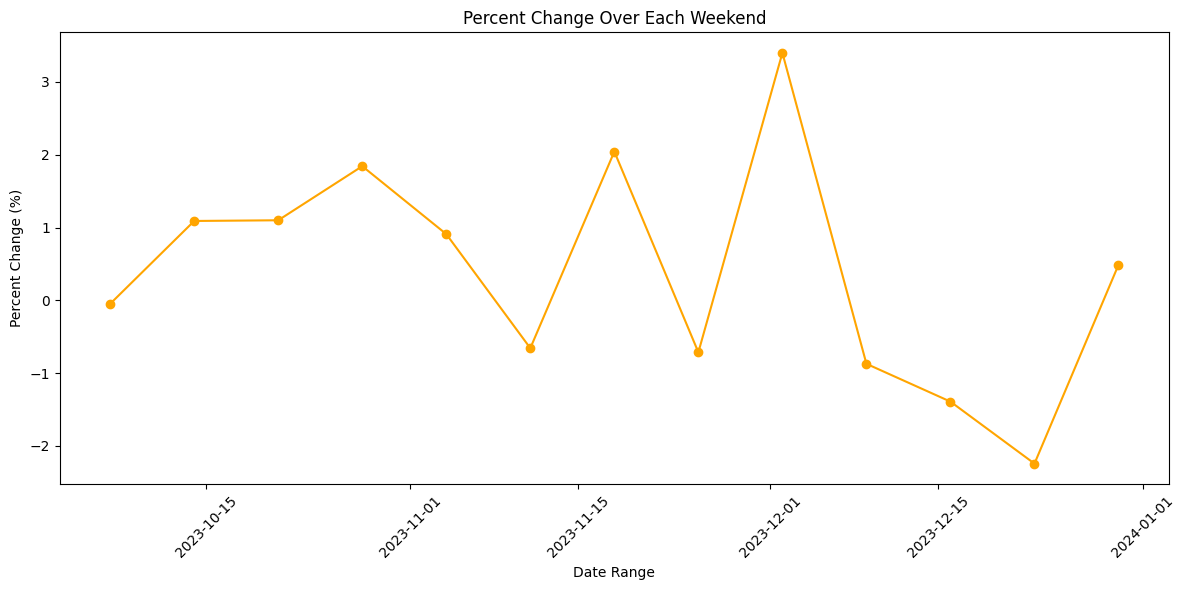

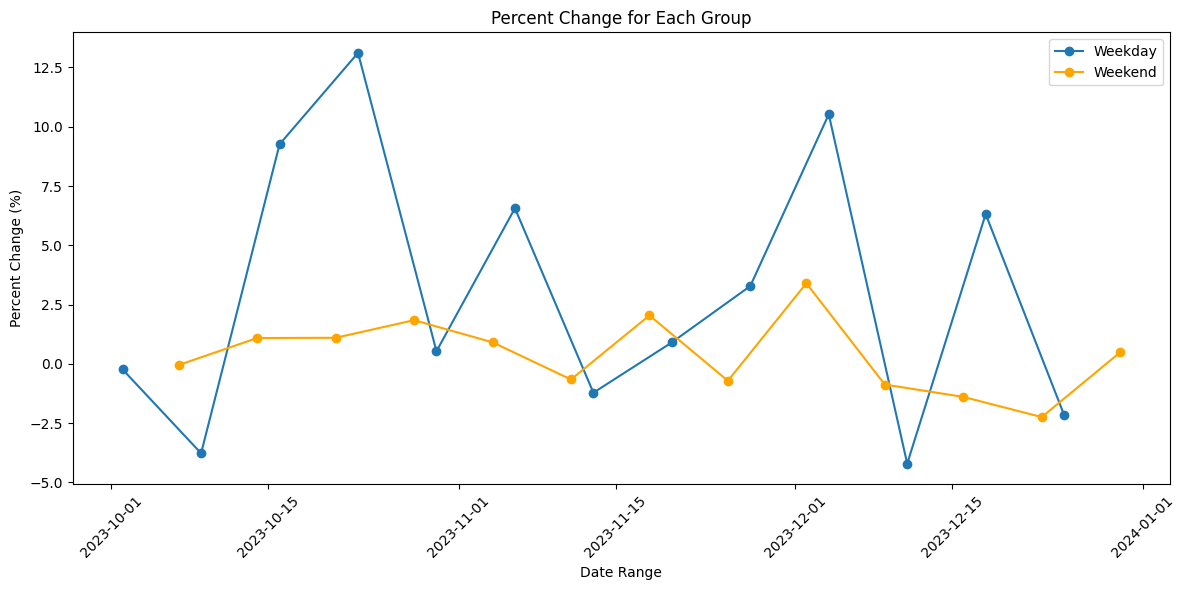

In [86]:
# WEEKDAY RETURNS
groups_weekday = weekdays_data.groupby(np.arange(len(weekdays_data.index)) // 1441)
print(groups_weekday)

percent_changes_weekday = []
for group_name, group_data in groups_weekday:
    open_price = group_data.loc[group_data.index[0], 'open']
    close_price = group_data.loc[group_data.index[-1], 'close']
    percent_change = ((close_price - open_price) / open_price) * 100
    percent_changes_weekday.append(percent_change)

start_timestamps_weekday = [group_data['timestamp'].iloc[0] for _, group_data in groups_weekday]

plt.figure(figsize=(12, 6))
plt.plot(start_timestamps_weekday, percent_changes_weekday, marker='o', linestyle='-')
plt.title('Percent Change for Over Monday - Friday')
plt.xlabel('Date Range')
plt.ylabel('Percent Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# WEEKEND RETURNS
groups_weekend = weekends_data.groupby(np.arange(len(weekends_data.index)) // 577)
print(groups_weekend)

percent_changes_weekend = []
for group_name, group_data in groups_weekend:
    open_price = group_data.loc[group_data.index[0], 'open']
    close_price = group_data.loc[group_data.index[-1], 'close']
    percent_change = ((close_price - open_price) / open_price) * 100
    percent_changes_weekend.append(percent_change)

start_timestamps_weekend = [group_data['timestamp'].iloc[0] for _, group_data in groups_weekend]

plt.figure(figsize=(12, 6))
plt.plot(start_timestamps_weekend, percent_changes_weekend, marker='o', linestyle='-', color = 'orange')
plt.title('Percent Change Over Each Weekend')
plt.xlabel('Date Range')
plt.ylabel('Percent Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plotting both weekday and weekend returns in the same figure
plt.figure(figsize=(12, 6))

plt.plot(start_timestamps_weekday, percent_changes_weekday, marker='o', linestyle='-', label='Weekday')
plt.plot(start_timestamps_weekend, percent_changes_weekend, marker='o', linestyle='-', label='Weekend', color='orange')

plt.title('Percent Change for Each Group')
plt.xlabel('Date Range')
plt.ylabel('Percent Change (%)')
plt.xticks(rotation=45)
plt.legend()  # Show legend to distinguish between weekday and weekend
plt.tight_layout()
plt.show()
